# 作业第四周（1）CNN网络练习

1.针对fashion_mnist数据集，设计一个CNN网络，训练fashion_mnist的分类操作，将准确率提高到92%以上。<BR>
并与第三周练习MLP模型相比较，在文末总结说明不同模型在收敛速度与分类准确率的表现。

In [2]:
#首先执行GPU资源分配代码，勿删除。
import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# import
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, Lambda, BatchNormalization, InputLayer
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, TensorBoard

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-6e98umax because the default path (/home/student/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = fashion_mnist.load_data()
# reshape for net
x_train = x_train_raw.reshape((x_train_raw.shape[0],) + (28, 28, 1)).astype('float32') / 255
x_test = x_test_raw.reshape((x_test_raw.shape[0],) + (28, 28, 1)).astype('float32') / 255

In [6]:
# model 1 | test scores: 0.926
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)

model1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Conv2D(64, kernel_size=3, activation='relu'),
    Dropout(0.25),
    Conv2D(128, kernel_size=3, activation='relu'),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, batch_size=512, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 2s 17ms/step - loss: 0.9471 - accuracy: 0.6586 - val_loss: 0.5070 - val_accuracy: 0.8173
Epoch 2/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5380 - accuracy: 0.8018 - val_loss: 0.4098 - val_accuracy: 0.8470
Epoch 3/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4619 - accuracy: 0.8319 - val_loss: 0.3635 - val_accuracy: 0.8620
Epoch 4/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4178 - accuracy: 0.8488 - val_loss: 0.3288 - val_accuracy: 0.8736
Epoch 5/50
94/94 [==============================] - 1s 13ms/step - loss: 0.3814 - accuracy: 0.8619 - val_loss: 0.3042 - val_accuracy: 0.8889
Epoch 6/50
94/94 [==============================] - 1s 13ms/step - loss: 0.3611 - accuracy: 0.8680 - val_loss: 0.2870 - val_accuracy: 0.8947
Epoch 7/50
94/94 [==============================] - 1s 14ms/step - loss: 0.3421 - accuracy: 0.8763 - val_loss: 0.2785 - val_accuracy: 0.8955
Epoch 8/50
94

In [80]:
# model 2 | test scores: 0.9103
y_train = y_train_raw.reshape(-1)
y_test = y_test_raw.reshape(-1)
early_stop = EarlyStopping(monitor="val_loss", patience=4, verbose=1)

model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding='valid', input_shape=(28, 28, 1)))
model2.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25)) 
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation="softmax"))

optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=512, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 1s 11ms/step - loss: 1.2038 - accuracy: 0.5559 - val_loss: 0.6471 - val_accuracy: 0.7660
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.7146 - accuracy: 0.7318 - val_loss: 0.5501 - val_accuracy: 0.7912
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.6273 - accuracy: 0.7655 - val_loss: 0.5081 - val_accuracy: 0.8134
Epoch 4/50
94/94 [==============================] - 1s 10ms/step - loss: 0.5797 - accuracy: 0.7849 - val_loss: 0.4714 - val_accuracy: 0.8257
Epoch 5/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5376 - accuracy: 0.8031 - val_loss: 0.4469 - val_accuracy: 0.8373
Epoch 6/50
94/94 [==============================] - 1s 10ms/step - loss: 0.5101 - accuracy: 0.8145 - val_loss: 0.4203 - val_accuracy: 0.8446
Epoch 7/50
94/94 [==============================] - 1s 10ms/step - loss: 0.4856 - accuracy: 0.8249 - val_loss: 0.4059 - val_accuracy: 0.8563
Epoch 8/50
94/94

In [83]:
# model 3 | test scores: 0.9146
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)

model3 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(64, (4, 4), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Conv2D(64, (4, 4), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')            
])

optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=512, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 2s 18ms/step - loss: 0.9558 - accuracy: 0.6684 - val_loss: 2.0756 - val_accuracy: 0.1851
Epoch 2/50
94/94 [==============================] - 1s 16ms/step - loss: 0.5437 - accuracy: 0.8028 - val_loss: 1.6562 - val_accuracy: 0.6152
Epoch 3/50
94/94 [==============================] - 1s 16ms/step - loss: 0.4664 - accuracy: 0.8319 - val_loss: 1.0570 - val_accuracy: 0.8122
Epoch 4/50
94/94 [==============================] - 1s 16ms/step - loss: 0.4243 - accuracy: 0.8462 - val_loss: 0.4684 - val_accuracy: 0.8739
Epoch 5/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3974 - accuracy: 0.8569 - val_loss: 0.3509 - val_accuracy: 0.8813
Epoch 6/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3753 - accuracy: 0.8658 - val_loss: 0.3139 - val_accuracy: 0.8827
Epoch 7/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3549 - accuracy: 0.8708 - val_loss: 0.2954 - val_accuracy: 0.8904
Epoch 8/50
94

In [5]:
# model 4 | test scores: 0.9309
mean_px = x_train.mean()
std_px = x_train.std()
def norm_input(x): 
    return (x-mean_px)/std_px
y_train = y_train_raw.reshape(-1)
y_test = y_test_raw.reshape(-1)

early_stop = EarlyStopping(monitor="val_loss", patience=6, verbose=1)

model4 = Sequential([
    Lambda(norm_input, input_shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1)),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size=512, epochs=20, verbose=1, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
94/94 [==============================] - 5s 48ms/step - loss: 0.7138 - accuracy: 0.7591 - val_loss: 2.2593 - val_accuracy: 0.2273
Epoch 2/20
94/94 [==============================] - 4s 41ms/step - loss: 0.4159 - accuracy: 0.8533 - val_loss: 1.7908 - val_accuracy: 0.3711
Epoch 3/20
94/94 [==============================] - 4s 41ms/step - loss: 0.3445 - accuracy: 0.8760 - val_loss: 1.1750 - val_accuracy: 0.6370
Epoch 4/20
94/94 [==============================] - 4s 41ms/step - loss: 0.3040 - accuracy: 0.8915 - val_loss: 0.6860 - val_accuracy: 0.7829
Epoch 5/20
94/94 [==============================] - 4s 41ms/step - loss: 0.2753 - accuracy: 0.9022 - val_loss: 0.3744 - val_accuracy: 0.8708
Epoch 6/20
94/94 [==============================] - 4s 41ms/step - loss: 0.2505 - accuracy: 0.9109 - val_loss: 0.2611 - val_accuracy: 0.9051
Epoch 7/20
94/94 [==============================] - 4s 41ms/step - loss: 0.2344 - accuracy: 0.9162 - val_loss: 0.2409 - val_accuracy: 0.9151
Epoch 8/20
94

In [24]:
# model 5 | test scores: 0.9260
mean_px = x_train.mean()
std_px = x_train.std()
def norm_input(x): 
    return (x-mean_px)/std_px
y_train = y_train_raw.reshape(-1)
y_test = y_test_raw.reshape(-1)

early_stop = EarlyStopping(monitor="val_loss", patience=4, verbose=1)

model5 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),    
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model5.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history5 = model5.fit(x_train, y_train, batch_size=512, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
94/94 [==============================] - 11s 118ms/step - loss: 0.8095 - accuracy: 0.7242 - val_loss: 3.0435 - val_accuracy: 0.1785
Epoch 2/20
94/94 [==============================] - 10s 108ms/step - loss: 0.4390 - accuracy: 0.8426 - val_loss: 4.1811 - val_accuracy: 0.2895
Epoch 3/20
94/94 [==============================] - 10s 108ms/step - loss: 0.3496 - accuracy: 0.8740 - val_loss: 2.7104 - val_accuracy: 0.3452
Epoch 4/20
94/94 [==============================] - 10s 108ms/step - loss: 0.2989 - accuracy: 0.8926 - val_loss: 2.2472 - val_accuracy: 0.4135
Epoch 5/20
94/94 [==============================] - 10s 109ms/step - loss: 0.2702 - accuracy: 0.9027 - val_loss: 0.8377 - val_accuracy: 0.7088
Epoch 6/20
94/94 [==============================] - 10s 109ms/step - loss: 0.2436 - accuracy: 0.9110 - val_loss: 0.2680 - val_accuracy: 0.9028
Epoch 7/20
94/94 [==============================] - 10s 109ms/step - loss: 0.2255 - accuracy: 0.9185 - val_loss: 0.2908 - val_accuracy: 0.9007

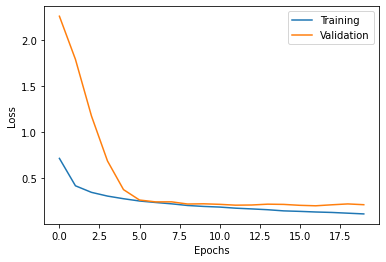

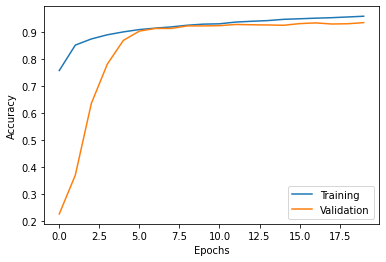

In [7]:
# visualize
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

# history.history.keys()
plot_history(history4)

In [6]:
# test
# y_test = np_utils.to_categorical(y_test_raw, 10)    # for 'categorical_crossentropy'
y_test = y_test_raw.reshape(-1)    # for 'sparse_categorical_crossentropy'
scores = model4.evaluate(x_test, y_test)
print(f"loss:{scores[0]:.2f}, accuracy:{scores[1]:.2f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.9309
loss:0.23, accuracy:0.93


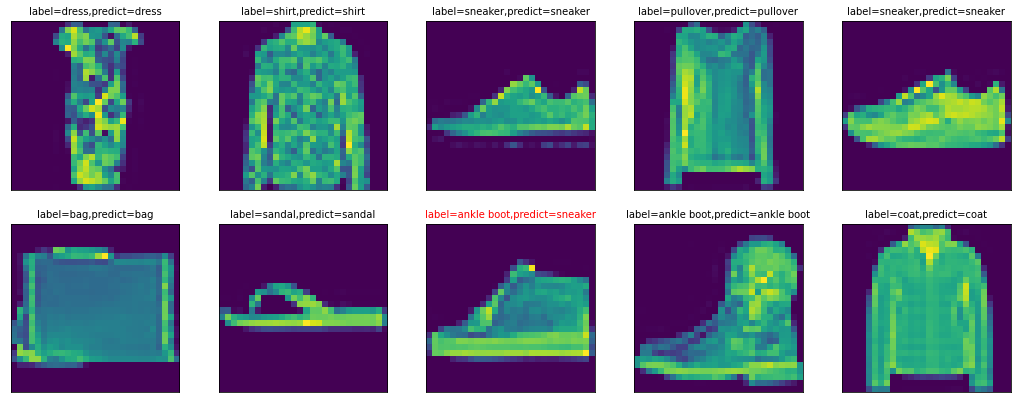

In [12]:
# predict
prediction = model4.predict_classes(x_test)

# convert label_id to label_text
def get_fashion_mnist_labels(label_id):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return text_labels[label_id]

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(18, 18)
    fig.tight_layout()
    if num > 25:
        num = 25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx])
        title = "label=" + get_fashion_mnist_labels(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + get_fashion_mnist_labels(prediction[idx])
        if labels[idx] != prediction[idx]:
            color = "red"
        else: 
            color = "black"
        ax.set_title(title, fontsize=10, color=color)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_test_raw, y_test_raw, prediction, idx=100)

# MLP和CNN在收敛速度与分类准确率的表现

### MLP的限制
   对于表格数据，我们寻找的模式可能涉及特征之间的交互，但是我们不能预先假设任何与特征交互相关的先验结构。 此时，多层感知机可能是最好的选择，然而对于高维感知数据，这种缺少结构的网络可能会变得不实用。假设我们有一个足够充分的照片数据集，数据集中是拥有标注的照片，每张照片具有百万级像素，这意味着网络的每次输入都有一百万个维度。 即使将隐藏层维度降低到$1000$，这个全连接层也将有$10^9$个参数。即使分辨率减小为十万像素，使用1000个隐藏单元的隐藏层也可能不足以学习到良好的图像特征，在真实的系统中我们仍然需要数十亿个参数。 此外，拟合如此多的参数还需要收集大量的数据。 然而，图像中本就拥有丰富的结构，而这些结构可以被人类和机器学习模型使用。CNN就是机器学习利用自然图像中一些已知结构的一种创造性方法。

### CNN的特点
**平移不变性：**这意味着检测对象在输入$X$中的平移，应该仅导致隐藏表示$H$中的平移，也就是说，加权权重$[V]_{a, b}$不会依赖像素的位置$(i, j)$。

**局部性：**为了收集用来训练参数$[H]_{i,j}$的相关信息，我们不应偏离到距$(i,j)$很远的地方。这意味着在$|d|>\Delta$的范围之外，我们可以设置$[V]_{i,j}=0$。

当图像处理的局部区域很小时，CNN与MLP的训练差异可能是巨大的：MLP可能需要数十亿个参数来表示网络中的一层，而CNN通常只需要几百个参数，而且不需要改变输入或隐藏表示的维数。 参数大幅减少的代价是，我们的特征现在是平移不变的，并且当确定每个隐藏活性值时，每一层只包含局部的信息。 以上所有的权重学习都将依赖于归纳偏置。当这种偏置与现实相符时，我们就能得到样本有效的模型，并且这些模型能很好地泛化到未知数据中。

### 收敛速度比较
CNN与MLP的不同在于多了卷积层和池化层，池化层降低了卷积层对位置的敏感性，同时降低对空间降采样表示的敏感性，在进行较大数据集的学习时往往能够更快的收敛。

### 分类准确率
对于高维的图像数据集而言，一般是CNN的效果更好一些，因为MLP无法处理像素在空间上的位置关系，我们仅仅通过将图像数据展平成一维向量而忽略了每个图像的空间结构信息，由于这些网络特征元素的顺序是不变的，所以最优的结果是利用先验知识，即相近像素之间的相互关联性，从图像数据中学习得到有效的模型。

但是CNN在处理图像上有着显著优势，就如上文所言的平移不变性、局部性、参数数量少等特点。另外，CNN也可以设计更深更有表现力的网络，如经典的VGG、ResNet-152等，而MLP的上限已经被其本身所限制。